In [3]:
# Importing lib for data pre-processing and algorithm building
!pip install decision-tree-id3
import matplotlib.pyplot as plt
import pandas as pd 

import six
import sys
sys.modules['sklearn.externals.six'] = six

from id3 import Id3Estimator

In [5]:
# Reading tennis data set
data = pd.read_csv('PlayTennis.csv')
# Showing first 5 records
data.head(5)

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [7]:
# Converting data to numericss
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
# converting each column
data['Outlook'] = Le.fit_transform(data['Outlook'])
data['Temperature'] = Le.fit_transform(data['Temperature'])
data['Humidity'] = Le.fit_transform(data['Humidity'])
data['Wind'] = Le.fit_transform(data['Wind'])
data['Play Tennis'] = Le.fit_transform(data['Play Tennis'])

In [9]:
# Seperating target and features
y = data['Play Tennis']
x = data.drop(['Play Tennis'],axis=1)

In [11]:
x

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [13]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    1
Name: Play Tennis, dtype: int32

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9, random_state = 0)

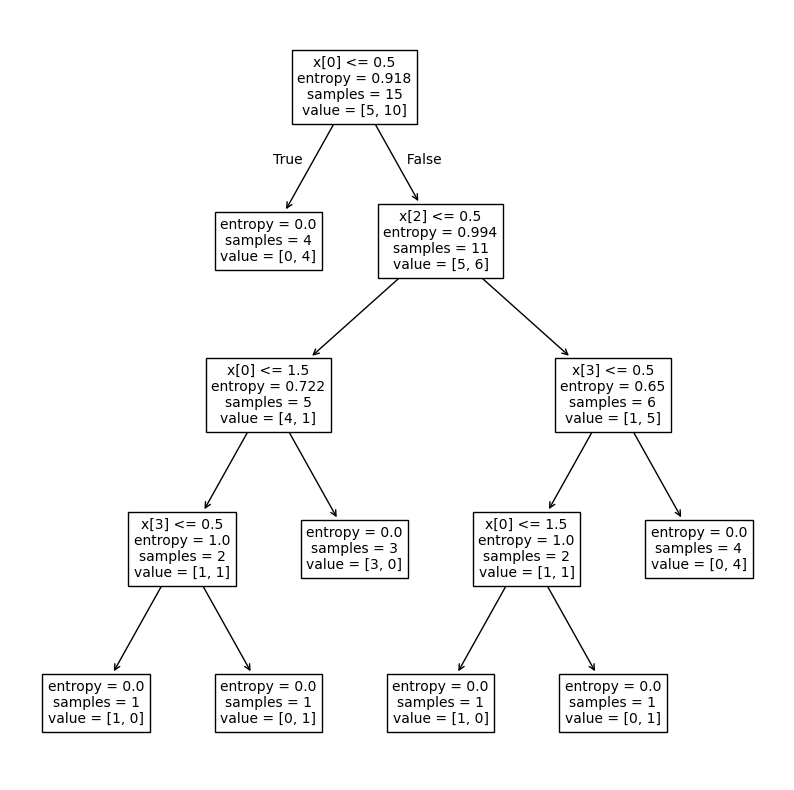

In [17]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(x_train, y_train)
clf.fit(x,y)
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [19]:
# Predictions
x_pred = clf.predict(x_test)

In [21]:
# Classification report to check accuracy, precision, recall etc
from id3 import Id3Estimator
estimator = Id3Estimator()
estimator.fit(x_train, y_train)
x_pred=estimator.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, x_pred))

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [23]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
estimator.fit(x_train, y_train)
x_pred = estimator.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, x_pred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.82      0.50      0.39        14
weighted avg       0.77      0.64      0.50        14



In [25]:
# Metrics library
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, x_pred))

0.6428571428571429


In [ ]:
pip uninstall decision-tree-id3